In [49]:
import numpy as np
from src.datasets import NoisySpectralSpeechDataset
from src.utils import checkpoint, spectral, notebook

In [50]:
dataset = NoisySpectralSpeechDataset(train=False, quiet=True)

In [51]:
CHECKPOINT = 'spectral-u-net-spectal-first-1575698669.full.ckpt'

In [52]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()

In [53]:
def reshape_spectrum(arr):
    assert arr.shape == (2, 256, 128)
    arr = np.concatenate([arr, np.zeros([2, 1, 128])], axis=1)
    assert arr.shape == (2, 257, 128)
    arr = np.concatenate([arr, np.zeros([2, 257, 1])], axis=2)
    assert arr.shape == (2, 257, 129)
    return arr

In [87]:
IDX = 123

noisy_spectral, clean_spectral = dataset[IDX]
noisy_arr = spectral.spec_to_audio(reshape_spectrum(noisy_spectral.numpy()))
clean_arr = spectral.spec_to_audio(reshape_spectrum(clean_spectral.numpy()))

In [88]:
noisy_spectral_batch = noisy_spectral.view(1, 2, 256, 128)
pred_clean_spectral_batch = net(noisy_spectral_batch)
pred_clean_spectral = pred_clean_spectral_batch.view(2, 256, 128)

In [89]:
pred_clean_arr = spectral.spec_to_audio(reshape_spectrum(pred_clean_spectral.detach().numpy()))

Pred clean signal


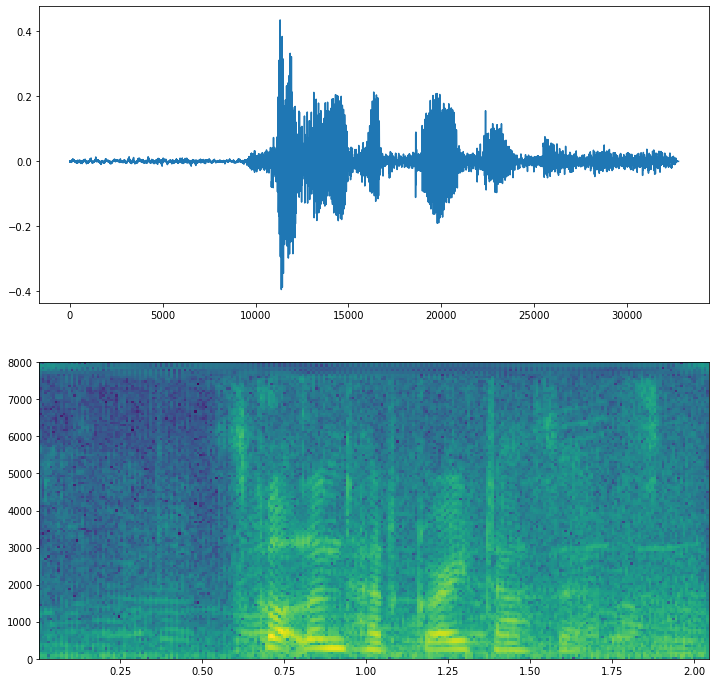

In [90]:
notebook.visualize_audio(pred_clean_arr, 'Pred clean signal')

Noisy signal


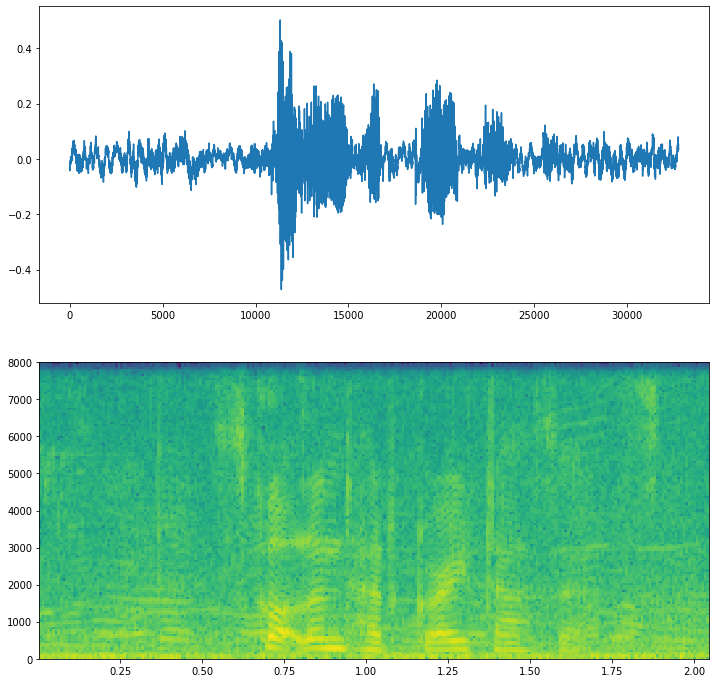

In [91]:
notebook.visualize_audio(dataset.noisy_data[IDX], 'Noisy signal')

Clean signal


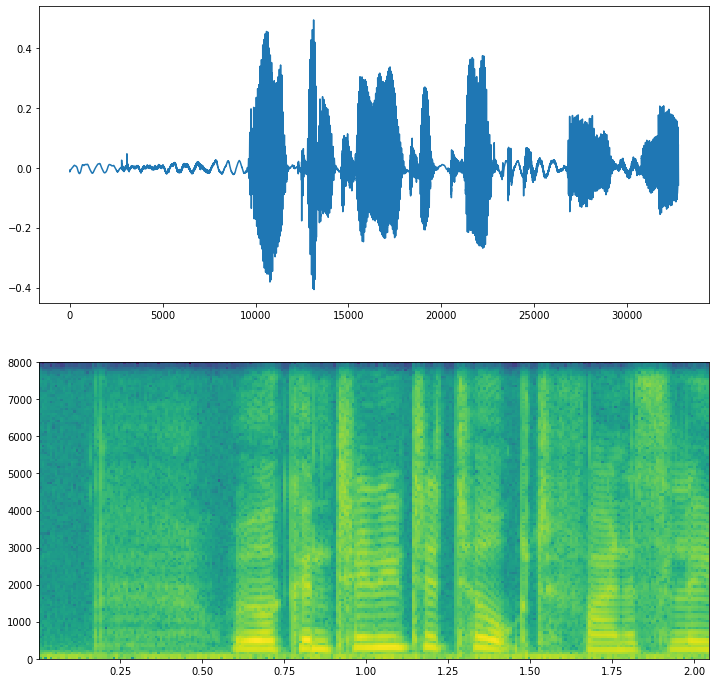

In [85]:
notebook.visualize_audio(dataset.clean_data[IDX], 'Clean signal')

Clean signal reconstructed


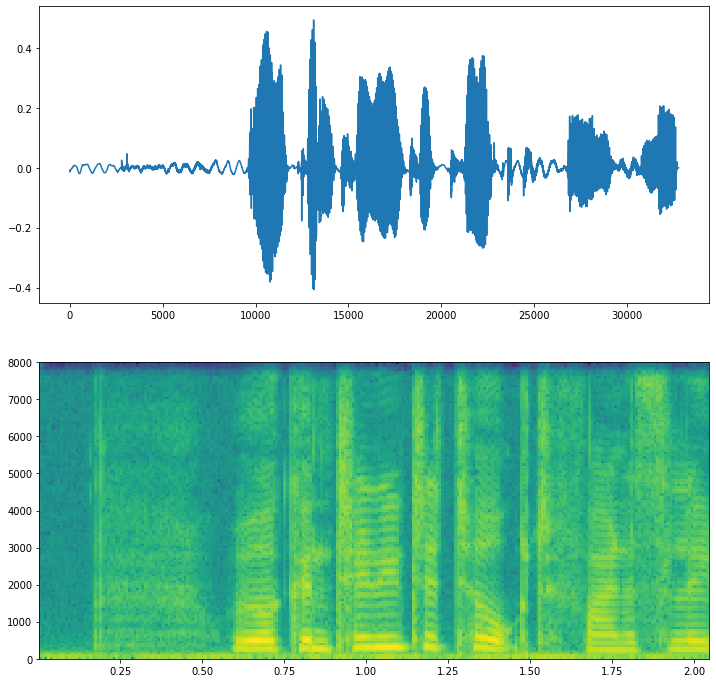

In [86]:
notebook.visualize_audio(clean_arr, 'Clean signal reconstructed')